# **MOVIE RATING AND PREDICTION**

In [81]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [43]:
# Read the dataset into a dataframe
df = pd.read_csv("IMDb Movies India.csv", encoding='latin1')

In [77]:
#First few rows
data.head(8)

,Year,Duration,Genre,Rating,Votes
1,2019,109,229,7.0,8
3,2019,110,184,4.4,35
5,1997,147,157,4.7,827
6,2005,142,289,7.4,1086
8,2012,82,320,5.6,326
9,2014,116,37,4.0,11
10,2004,96,229,6.2,17
11,2016,120,316,5.9,59


**DATA PREPROCESSING**

In [55]:
data.isnull().values.any()

True

In [56]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

**Heatmap Check**

<Axes: >

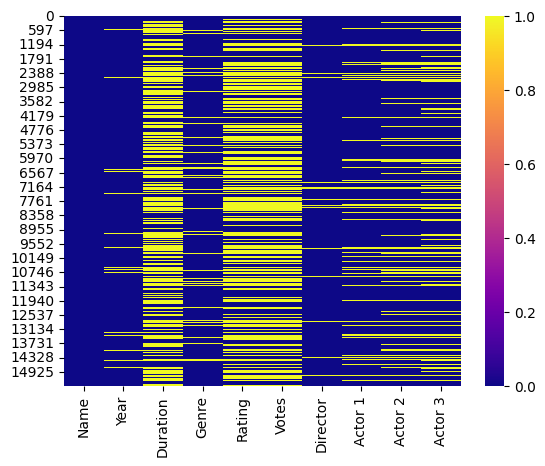

In [58]:
sns.heatmap(data.isnull(),cmap='plasma')

**Droping Null values**

In [59]:
data.dropna(inplace=True)

In [60]:
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

DROP UNNECESSARY COLUMNS

In [62]:
data = data.drop(['Name','Director','Actor 1','Actor 2','Actor 3'], axis=1)

In [78]:
data.head(8)

,Year,Duration,Genre,Rating,Votes
1,2019,109,229,7.0,8
3,2019,110,184,4.4,35
5,1997,147,157,4.7,827
6,2005,142,289,7.4,1086
8,2012,82,320,5.6,326
9,2014,116,37,4.0,11
10,2004,96,229,6.2,17
11,2016,120,316,5.9,59


# ***Categorial column to integer conversion***

In [65]:
data['Year'] = data['Year'].str.extract('(\d+)', expand=False).astype(int)
data['Duration'] = data['Duration'].str.extract('(\d+)', expand=False).astype(int)
data['Votes'] = data['Votes'].str.replace(',', '').astype(int)

In [79]:
data.head(8)

,Year,Duration,Genre,Rating,Votes
1,2019,109,229,7.0,8
3,2019,110,184,4.4,35
5,1997,147,157,4.7,827
6,2005,142,289,7.4,1086
8,2012,82,320,5.6,326
9,2014,116,37,4.0,11
10,2004,96,229,6.2,17
11,2016,120,316,5.9,59


# ***Categorial labels to numeric values***

In [67]:
label_encoder=LabelEncoder()
data['Genre']=label_encoder.fit_transform(data['Genre'])

In [68]:
data.head(10)

,Year,Duration,Genre,Rating,Votes
1,2019,109,229,7.0,8
3,2019,110,184,4.4,35
5,1997,147,157,4.7,827
6,2005,142,289,7.4,1086
8,2012,82,320,5.6,326
9,2014,116,37,4.0,11
10,2004,96,229,6.2,17
11,2016,120,316,5.9,59
12,1991,161,323,6.5,983
13,2012,166,159,5.7,512


# **forming Features and Target from splitting data**

In [69]:
from re import X
x = data.drop('Rating', axis=1)
y = data['Rating']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# **Linear regression model building**

In [70]:
linear_model= LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

# **Making prediction with the LR Model**

In [73]:
y_pred_linear = linear_model.predict(X_test)

# **Evaluating model for LR**

In [74]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("Mean Squared Error (LR):", mse_linear)

Mean Squared Error (LR): 1.6886564632113519
